# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Dataset

In [2]:
Net_f = pd.read_csv(r'C:\Users\Rishi\Downloads\combined_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
Net_f

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [3]:
#To inspect the shape of the dataset
Net_f.shape

(24058263, 2)

In [4]:
#To inspect the datatypes of the dataset
Net_f.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [8]:
#To inspect the null values of the dataset
Net_f.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [9]:
Net_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [11]:
#To print the head of dataset
Net_f.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [12]:
#get the customer count with NaN values
movie_count=Net_f.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

4499

In [13]:
# get customer count
cust_count = Net_f['Cust_Id'].nunique()-movie_count
cust_count

470758

In [14]:
#get rating count
rating_count = Net_f['Cust_Id'].count() - movie_count
rating_count

24053764

In [18]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
rattingss = Net_f.groupby('Rating')['Rating'].agg(['count'])

# To plot the distribution of the ratings in as a bar plot

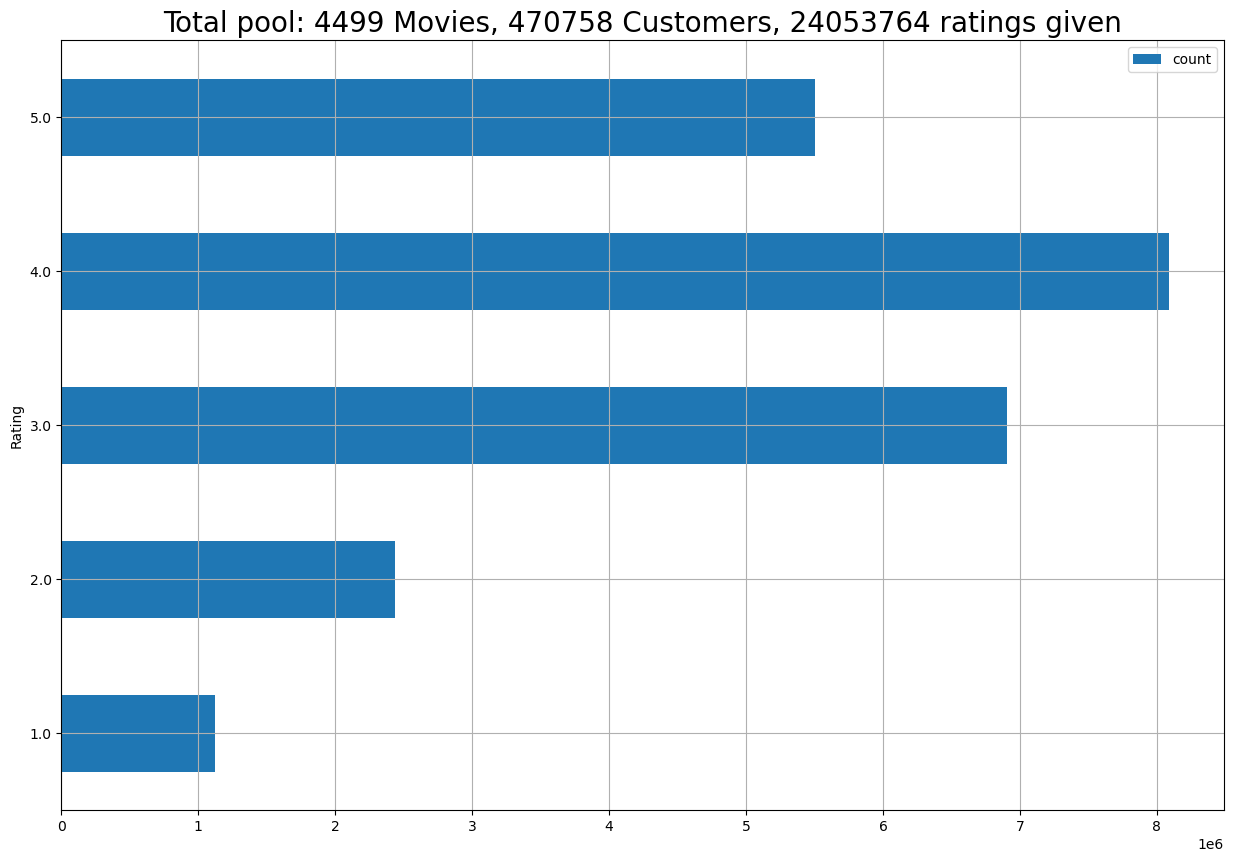

In [20]:
ax=rattingss.plot(kind='barh',figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [21]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(Net_f.Rating))

In [22]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [23]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [24]:
df_nan.shape

(4499, 1)

In [25]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [31]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [34]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(Net_f) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [33]:
#x =zip(df_nan['index'][1:],df_nan['index'][:-1]) zip example

In [36]:
#To append the above created array to the datset after removing the 'nan' rows
Net_f = Net_f[pd.notnull(Net_f['Rating'])]#movies count so nan
Net_f['Movie_Id'] = movie_np.astype(int)
Net_f['Cust_Id'] =Net_f['Cust_Id'].astype(int)
print('-Dataset examples-')
Net_f.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [38]:
Net_f.shape

(24053764, 3)

# Data Cleaning

In [39]:
f = ['count','mean']
#count and mean 

In [40]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = Net_f.groupby('Movie_Id')['Rating'].agg(f)


In [41]:
dataset_movie_summary.index = dataset_movie_summary.index.map(int)


In [42]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)


In [43]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index


In [44]:
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [46]:
# To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = Net_f.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [47]:
print(f'Original Shape: {Net_f.shape}')


Original Shape: (24053764, 3)


In [48]:
Net_f = Net_f[~Net_f['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the which ever  movies we put under drop list are present or not---
#if present drop /remove them
Net_f = Net_f[~Net_f['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(Net_f.shape))

After Trim Shape: (17337458, 3)


In [49]:
print('-Data Examples-')
Net_f.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [50]:
# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [51]:
df_p = pd.pivot_table(Net_f,values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_p.shape)

(143458, 1350)


In [52]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### To load the movie_titles dataset

In [57]:
df_title = pd.read_csv(r"C:\Users\Rishi\Downloads\movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id', inplace=True)

In [58]:
print(df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [59]:
df_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


# To install the scikit-surprise library for implementing SVD

In [82]:
#model building
import math
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [93]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(Net_f[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [94]:
data

In [95]:
svd =SVD()
# cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
#for 1st fold- 1,2,3,4,5

In [96]:
cross_validate(svd, data, measures=['RMSE','MAE'], cv=4)

{'test_rmse': array([1.00057268, 0.99276542, 0.99604778, 1.00231816]),
 'test_mae': array([0.79978168, 0.80012223, 0.79805549, 0.80628194]),
 'fit_time': (0.7377035617828369,
  0.7617888450622559,
  0.8748917579650879,
  0.8807785511016846),
 'test_time': (0.09335780143737793,
  0.0940854549407959,
  0.09808897972106934,
  0.09413743019104004)}

In [97]:
Net_f.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [98]:
dataset_44937 = Net_f[(Net_f['Cust_Id'] == 44937) & (Net_f['Rating'] == 5)]
dataset_44937 = dataset_44937.set_index('Movie_Id')
dataset_44937 = dataset_44937.join(df_title)['Name']
dataset_44937.head(10)

Movie_Id
3                                          Character
443                               Rabbit-Proof Fence
872                                    Seven Samurai
1264                                      The Closet
1435    Wallace & Gromit in Three Amazing Adventures
1466                                 Midnight Cowboy
2015                                     Talk to Her
2016                           The Magdalene Sisters
2585                   Absolutely Fabulous: Series 2
3371                                     Whale Rider
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 1

In [99]:
# Create a shallow copy for the movies dataset
dataset_44937 = df_title.copy()

dataset_44937 = dataset_44937.reset_index()

#To remove all the movies rated less often 
dataset_44937 = dataset_44937[~dataset_44937['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
#data = Net_f.load_from_df(Net_f[['Cust_Id', 'Movie_Id', 'Rating']], reader)
data=Dataset.load_from_df(Net_f[['Cust_Id','Movie_Id','Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
model.fit(trainset)

#Predict the ratings for user_712664
dataset_44937['Estimate_Score'] = dataset_44937['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
dataset_44937 = dataset_44937.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
dataset_44937 = dataset_44937.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(dataset_44937.head(10))

         Year                    Name  Estimate_Score
27     2002.0         Lilo and Stitch        3.946421
29     2003.0  Something's Gotta Give        3.796441
17     1994.0        Immortal Beloved        3.721628
10459  1988.0     Red Dwarf: Series 1        3.661691
12895  1994.0   Bullets Over Broadway        3.661691
12900  1998.0                Star Kid        3.661691
12899  2001.0          Reba: Season 1        3.661691
12898  1976.0               Pinocchio        3.661691
12897  1989.0    Fright Night Part II        3.661691
12896  2002.0             Unspeakable        3.661691
